Classifying Fashion MNIST with CNN.

In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np

x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

model = Sequential([
    Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(8, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
import tensorflow as tf

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

In [5]:
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.9570 - sparse_categorical_accuracy: 0.6516 - val_loss: 0.4189 - val_sparse_categorical_accuracy: 0.8447
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4475 - sparse_categorical_accuracy: 0.8358 - val_loss: 0.3505 - val_sparse_categorical_accuracy: 0.8709
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3888 - sparse_categorical_accuracy: 0.8567 - val_loss: 0.3144 - val_sparse_categorical_accuracy: 0.8806
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3556 - sparse_categorical_accuracy: 0.8717 - val_loss: 0.3087 - val_sparse_categorical_accuracy: 0.8835
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3296 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.2810 - val_sparse_categorical_accuracy: 0.8953
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3035 - sparse_categorical_accuracy: 0.8876 - val_loss: 0.2810 - val_sparse_categorical_accurac

In [6]:
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2523 - sparse_categorical_accuracy: 0.9122


[0.24626345932483673, 0.909600019454956]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


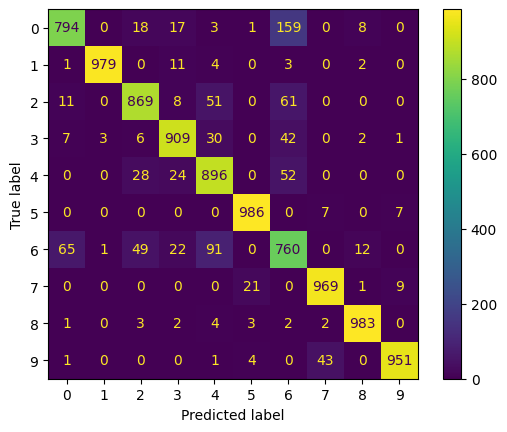

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

sft = keras.layers.Softmax()
y_pred = model.predict(x_test)
y_pred = sft(y_pred)
y_pred = np.argmax(np.asarray(y_pred), axis=-1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Now we add batch normalization layers and examine its effects.

In [8]:
from keras.layers import BatchNormalization

model = Sequential([
    Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(8, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.2)


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.0307 - sparse_categorical_accuracy: 0.6962 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.8633
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.4039 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.3230 - val_sparse_categorical_accuracy: 0.8819
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.2984 - val_sparse_categorical_accuracy: 0.8869
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3154 - sparse_categorical_accuracy: 0.8860 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.8923
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.8932 - val_loss: 0.2655 - val_sparse_categorical_accuracy: 0.9027
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2760 - sparse_categorical_accuracy: 0.8980 - val_loss: 0.2966 - val_sparse_categorical_accur

In [10]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2403 - sparse_categorical_accuracy: 0.9186


[0.22731630504131317, 0.9200000166893005]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


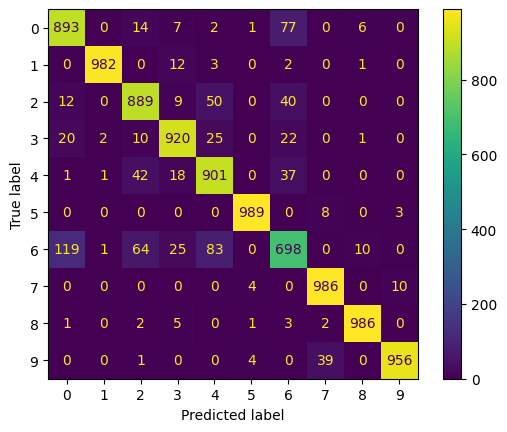

In [11]:
y_pred = model.predict(x_test)
y_pred = sft(y_pred)
y_pred = np.argmax(np.asarray(y_pred), axis=-1)
cm_bn = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bn)
disp.plot()
plt.show()

We can see that the validation test score has risen to 0.6 percent with batch normalization. In confusion matrix this is confirmed as well, the diagonal entries are larger for the case with batch normalization.

We will train a model to classify MNIST data. We will use Global Average pooling layer instead of flatten layer, so the model will be able to classify images with different shapes.

In [12]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
from keras.layers import GlobalAveragePooling2D

model = Sequential([
    Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(8, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 1.5642 - sparse_categorical_accuracy: 0.5103 - val_loss: 0.1166 - val_sparse_categorical_accuracy: 0.9657
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3268 - sparse_categorical_accuracy: 0.8946 - val_loss: 0.0833 - val_sparse_categorical_accuracy: 0.9727
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2346 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.0702 - val_sparse_categorical_accuracy: 0.9768
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1925 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.0623 - val_sparse_categorical_accuracy: 0.9809
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1739 - sparse_categorical_accuracy: 0.9454 - val_loss: 0.0523 - val_sparse_categorical_accuracy: 0.9851
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1501 - sparse_categorical_accuracy: 0.9540 - val_loss: 0.0508 - val_sparse_categorical_accur

We will save the model to use it elsewhere for numeric classification.

In [15]:
model.save('mnist_GAP.keras')